In [ ]:
#load the datset -> feature extration -> data visulization
# data cleaning-> train_test_split->model building
#->model training-> model evaluation->model saving->stramilit application deploy

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None,index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df=df[[2,3]].reset_index(drop=True)
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.columns=['sentiment','text']
df.head()


,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
df=df[df['text'].apply(len)>5]

In [ ]:
df.shape

(72883, 2)

In [ ]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-fkdfhb2r
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-fkdfhb2r
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=2bea78e17aaef19f99b484f1d644338b2bb70c9a7ef621a2d7074322006207d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-2s0nd5ls/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as kgp

In [ ]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
df=kgp.get_basic_features(df)

In [ ]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

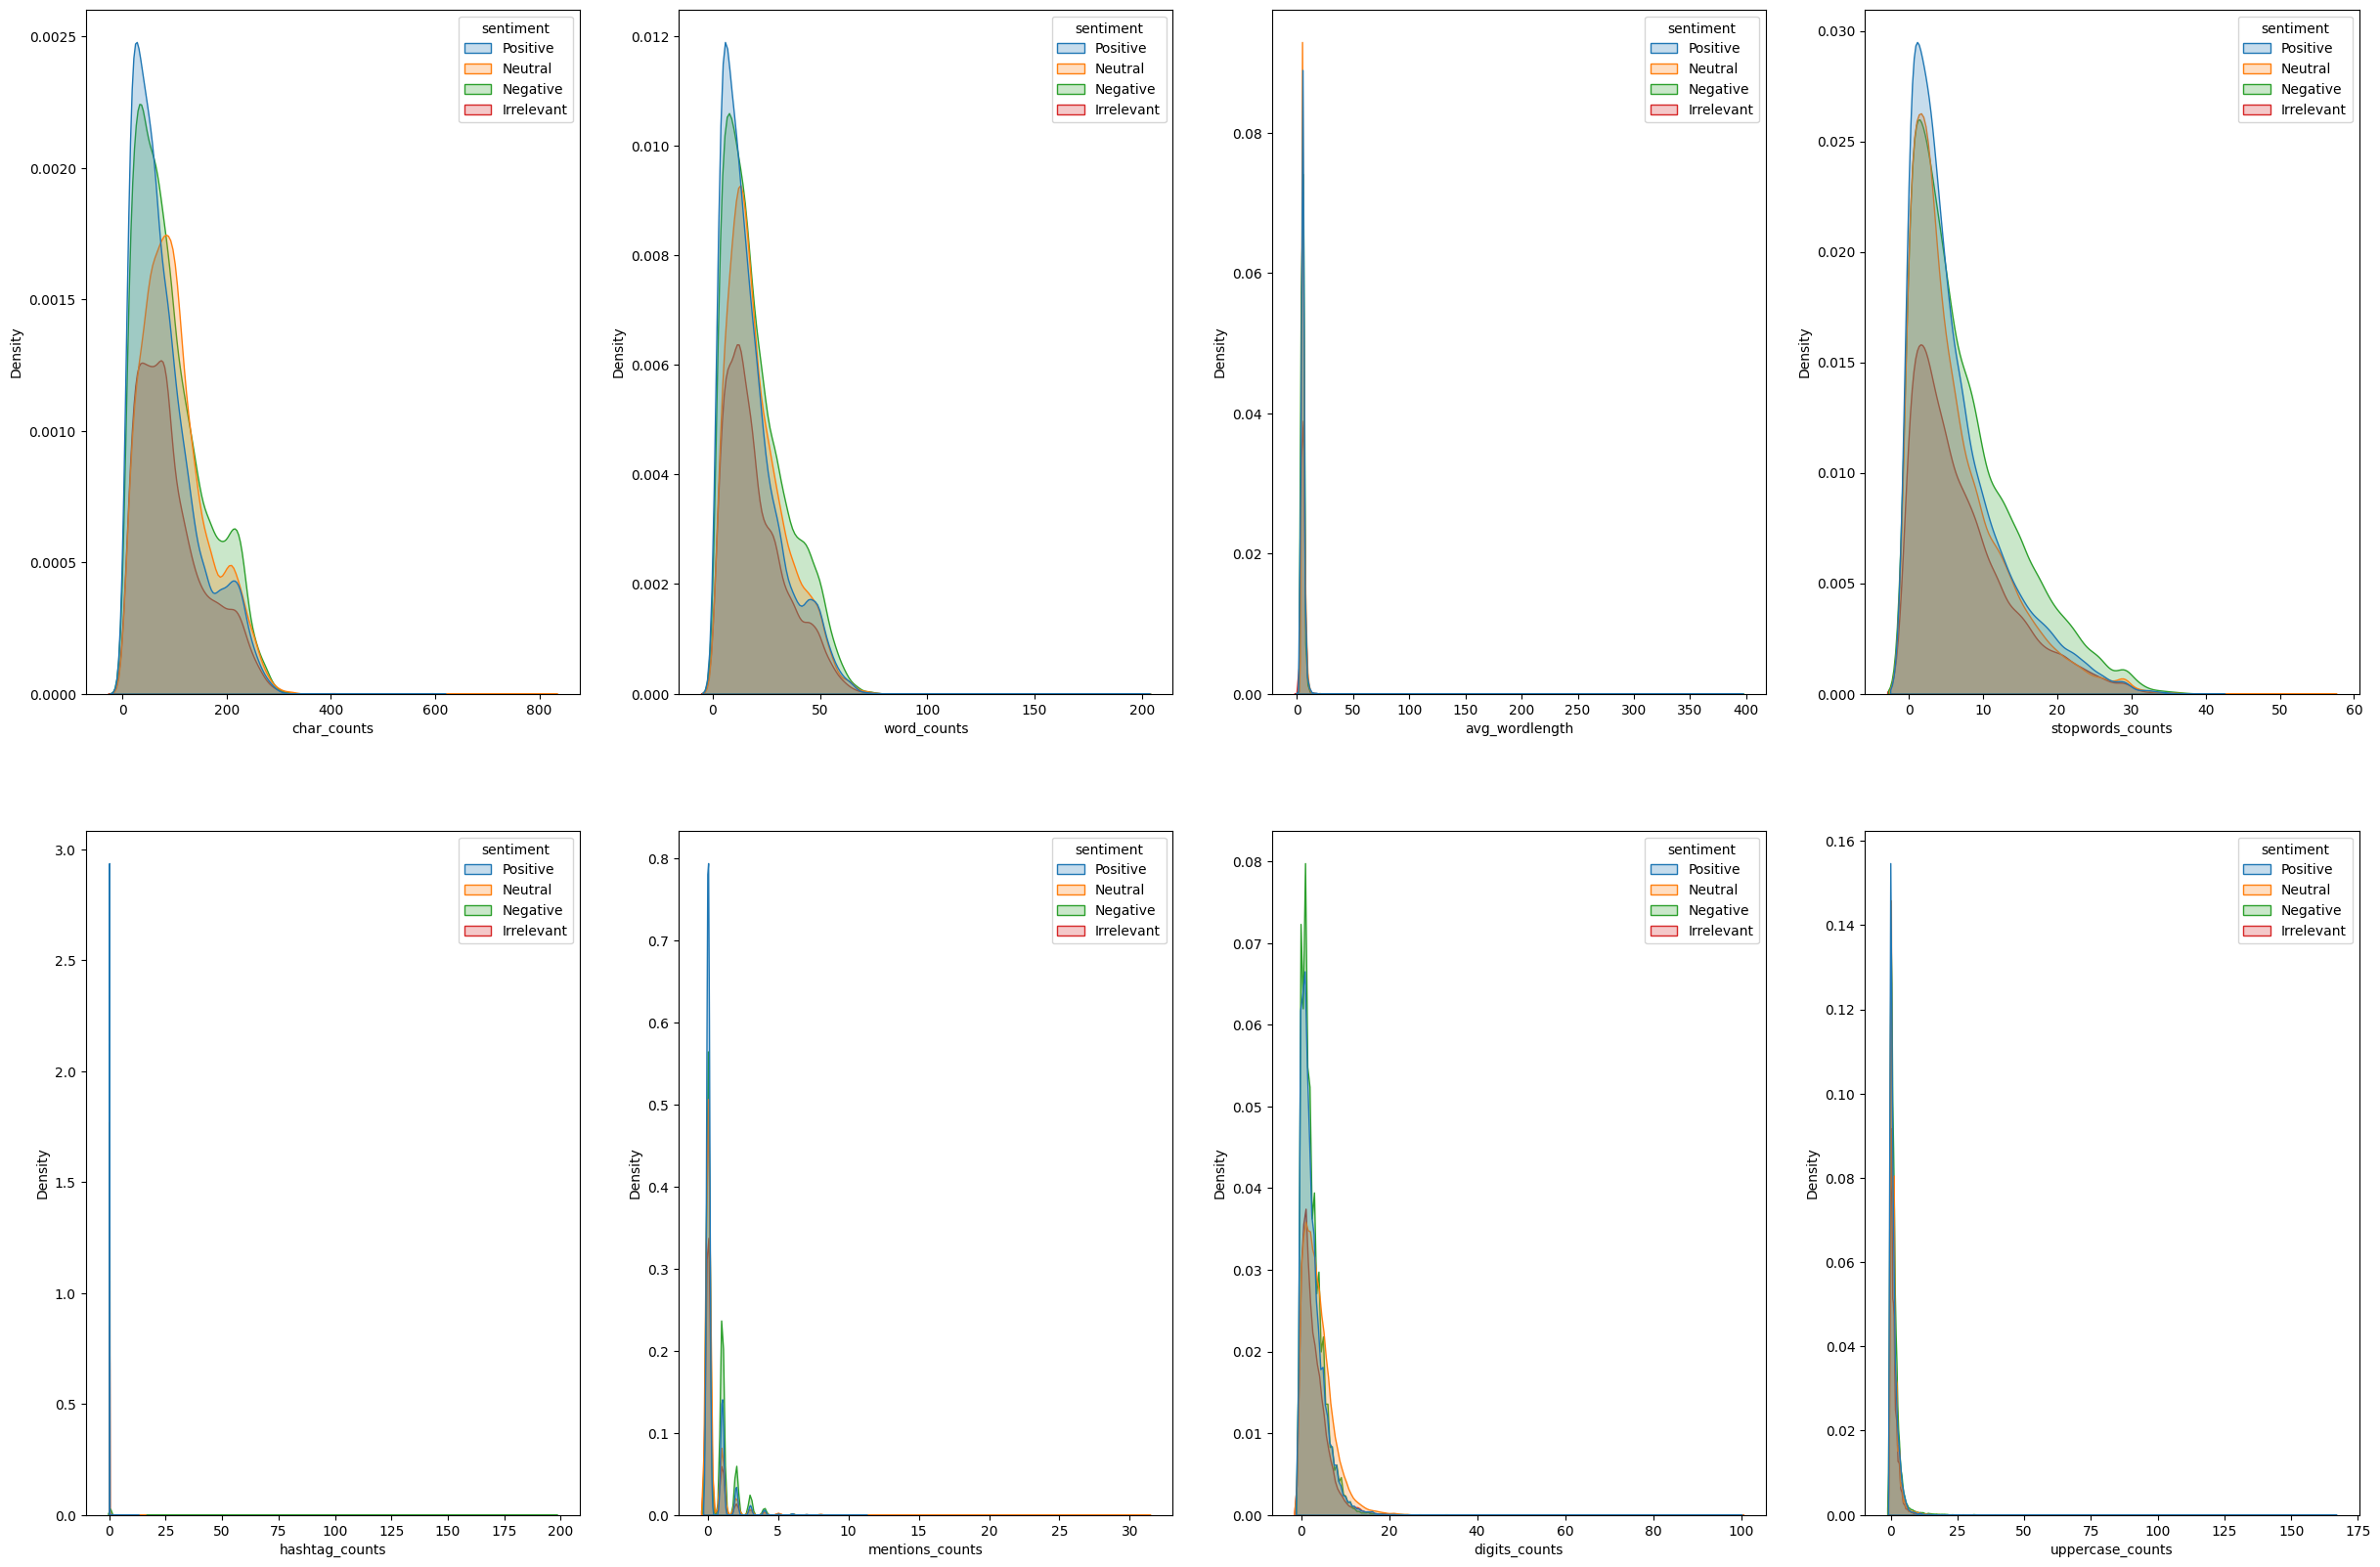

In [ ]:
plt.figure(figsize=(30,20))
num_cols=df.select_dtypes(include='number').columns
for index,col in enumerate(num_cols):
  plt.subplot(2,4,index+1)
  sns.kdeplot(data=df, x=col,hue='sentiment',fill=True)

<Axes: ylabel='count'>

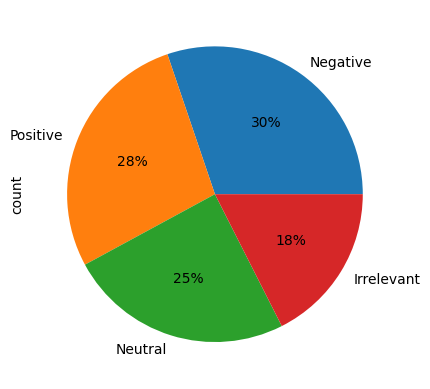

In [ ]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

In [ ]:
#worldcloud
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)

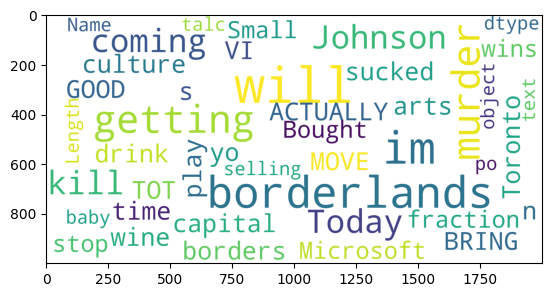

In [ ]:
wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

<function matplotlib.pyplot.show(close=None, block=None)>

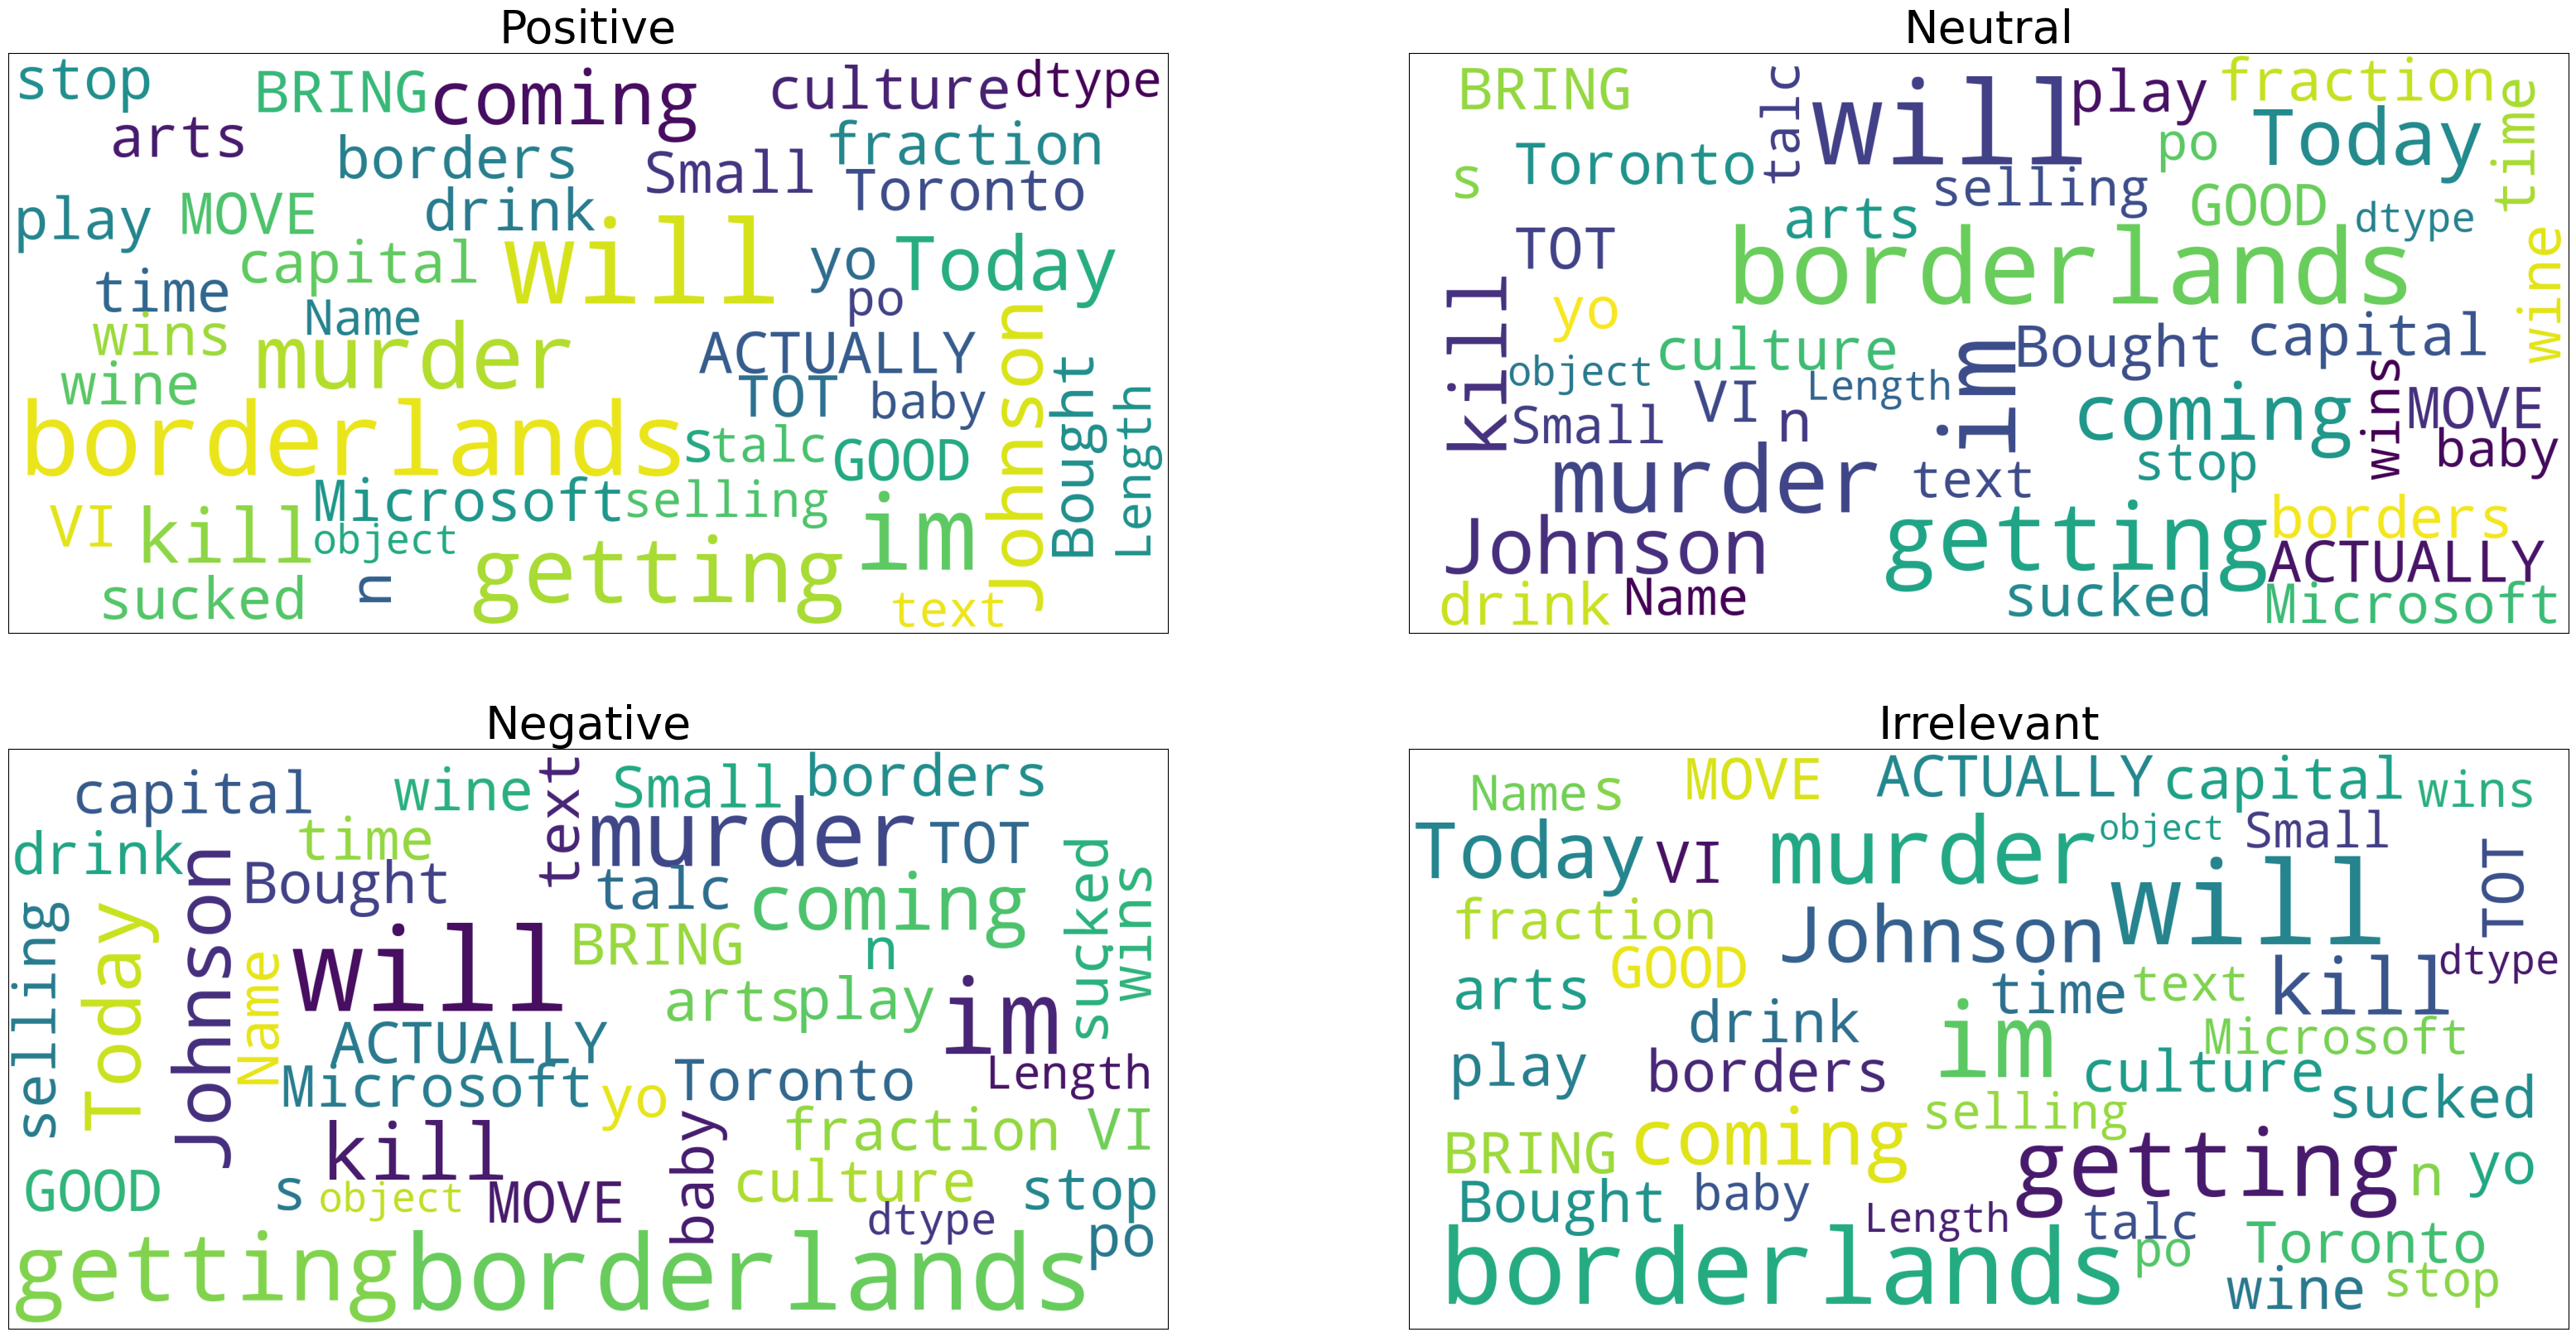

In [ ]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
  plt.subplot(2,2,index+1)
  data=df[df['sentiment']==sent]['text']
  wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
  plt.imshow(wordcloud)
  plt.xticks([]),plt.yticks([])
  plt.title(sent,fontsize=40)
plt.show


###data cleaning

In [ ]:
df['text']=df['text'].apply(lambda x:x.lower())
df['text']=df['text'].apply(lambda x:kgp.remove_urls(x))
df['text']=df['text'].apply(lambda x:kgp.remove_html_tags(x))
df['text']=df['text'].apply(lambda x:kgp.remove_rt(x))
df['text']=df['text'].apply(lambda x:kgp.remove_special_chars(x))


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [ ]:
X_train

70828                                        st ghostrecon
44616    okay i was scared and didnt know what was goin...
64280    this bull helvick is a problem eamaddennfl eas...
65559    johnson johnson to stop selling whitening powd...
50491               piss people off at fifa and on twitter
                               ...                        
22067    the construction of this building has failed d...
47727    just spend a hour in home depot home renovatio...
44342                           hey vzwsupport no response
45322    team nice try rhandlerr but your photoshopped ...
70925    was good fun watch wolves get torn apart by th...
Name: text, Length: 58306, dtype: object

In [ ]:
X_train.shape, X_test.shape

((58306,), (14577,))

model building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
clf=Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs=-1))])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.86      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.93      0.92      0.92      3553
    Positive       0.91      0.95      0.93      3982

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.93      0.93     14577



In [ ]:
import pickle
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))

In [ ]:
clf.predict(['let met not upset you'])

array(['Negative'], dtype=object)

In [ ]:
clf.predict(['you are looking beautiful'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['the sun is bright'])

array(['Irrelevant'], dtype=object)